In [2]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import csv
from collections import defaultdict, Counter
from matplotlib.pyplot import *
import matplotlib.colors
from matplotlib.animation import FuncAnimation
import os
import matplotlib.cm as cm
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [4]:
def getSlope(SESS_NUMBER, trans_data, non_inf_max_data):
    
    time_data = np.array(trans_data[SESS_NUMBER - 1][1])[:,0]
    transaction_data = np.array(trans_data[SESS_NUMBER - 1][1])[:,1]
    max_time = non_inf_max_data[SESS_NUMBER - 1][1]
    
    # get mean price before 
    mean_pre_list = []
    lowest_mean = 0
    for i in range(len(time_data)):
        if(time_data[i] < 300):
            mean_pre_list.append(transaction_data[i])
        else:
            if(time_data[i] <= max_time):
                if(transaction_data[i] < lowest_mean):
                    lowest_mean = transaction_data[i]
    
    slope = (lowest_mean - np.mean(mean_pre_list)) / (max_time - 300)
    
    return slope


In [5]:
def getNewAverageGradient(trans_filename, non_inf_filename):
    
    # first, sort all the data into respective session data 

    ##########################################################################################
    # 1: sort non influencers data
    filename = non_inf_filename

    # stores the num influencers and times when the 95% threshold was reached for each of the 200 sessions
    non_inf_max_data = []
    for i in range(0, 200):
        non_inf_max_data.append([i+1,[]])

    # just stores all csv data 
    data_lake = []

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        for row in readCSV:
            data_lake.append([float(row[0]), float(row[1])])

    prev_time = 0
    sess_number = 1

    for i in data_lake:
        if(prev_time == 0):
                prev_time = float(i[0])
        else:
            if(float(i[0]) - prev_time < 0):
                non_inf_max_data[sess_number - 1][1] = prev_time
                prev_time = float(i[0])
                sess_number += 1
            else:
                prev_time = float(i[0])

    non_inf_max_data[-1][1] = float(i[0])

    ##########################################################################################
    
    ##########################################################################################
    # 2: sort all transactions data
    filename = trans_filename

    # stores the num influencers and times when the 95% threshold was reached for each of the 200 sessions
    trans_data = []
    for i in range(0, 200):
        trans_data.append([i+1,[]])

    # just stores all csv data 
    data_lake = []

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        for row in readCSV:
            data_lake.append([float(row[0]), float(row[1])])

    prev_time = 0
    sess_number = 1

    for i in data_lake:
        if(prev_time == 0):
                prev_time = float(i[0])
                trans_price = float(i[1])
                trans_data[sess_number - 1][1].append([prev_time, trans_price])
        else:
            if(float(i[0]) - prev_time < 0):
                sess_number += 1
                prev_time = float(i[0])
                trans_price = float(i[1])
                trans_data[sess_number - 1][1].append([prev_time, trans_price])
            else:
                prev_time = float(i[0])
                prev_time = float(i[0])
                trans_price = float(i[1])
                trans_data[sess_number - 1][1].append([prev_time, trans_price])

    ##########################################################################################
    
    slope_data = []
    SESS_NUMBER = 0

    for i in range(1, 201):
        SESS_NUMBER = i
        #print("Session #{}".format(i))
        slope_data.append(getSlope(SESS_NUMBER, trans_data, non_inf_max_data))

    mean_gradient = np.mean(slope_data)
    return mean_gradient

In [6]:
#print(getAverageGradient(trans_filename, non_inf_filename))
gradient_data = []


# Get all the data, store the change in mean opinion over time for every file, store it in data_iter
    
directory = r'./NegativeInfluencers'

print('Going through Negative results...')
for filename in os.listdir(directory):
    
    if(filename[0] != 'n'):
        
        trans_filename = 'NegativeInfluencers/' + filename
        
        print("Getting data from {}...".format(trans_filename))
                
        # get index from number of influencers
        num_influencers = int(filename.partition('.')[0])
        non_inf_filename = 'NegativeInfluencers/noninf_ops_' + str(num_influencers) + '.csv'
        gradient_data.append([num_influencers, getNewAverageGradient(trans_filename, non_inf_filename)])

        
print('Done')

Going through Negative results...
Getting data from NegativeInfluencers/68.csv...
Getting data from NegativeInfluencers/6.csv...
Getting data from NegativeInfluencers/54.csv...
Getting data from NegativeInfluencers/40.csv...
Getting data from NegativeInfluencers/41.csv...
Getting data from NegativeInfluencers/7.csv...
Getting data from NegativeInfluencers/55.csv...
Getting data from NegativeInfluencers/69.csv...
Getting data from NegativeInfluencers/43.csv...
Getting data from NegativeInfluencers/57.csv...
Getting data from NegativeInfluencers/5.csv...
Getting data from NegativeInfluencers/56.csv...
Getting data from NegativeInfluencers/4.csv...
Getting data from NegativeInfluencers/42.csv...
Getting data from NegativeInfluencers/46.csv...
Getting data from NegativeInfluencers/52.csv...
Getting data from NegativeInfluencers/1.csv...
Getting data from NegativeInfluencers/53.csv...
Getting data from NegativeInfluencers/47.csv...
Getting data from NegativeInfluencers/51.csv...
Getting dat

<ipython-input-8-5c72a931cf87>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


[-0.00030807 -0.23613592]


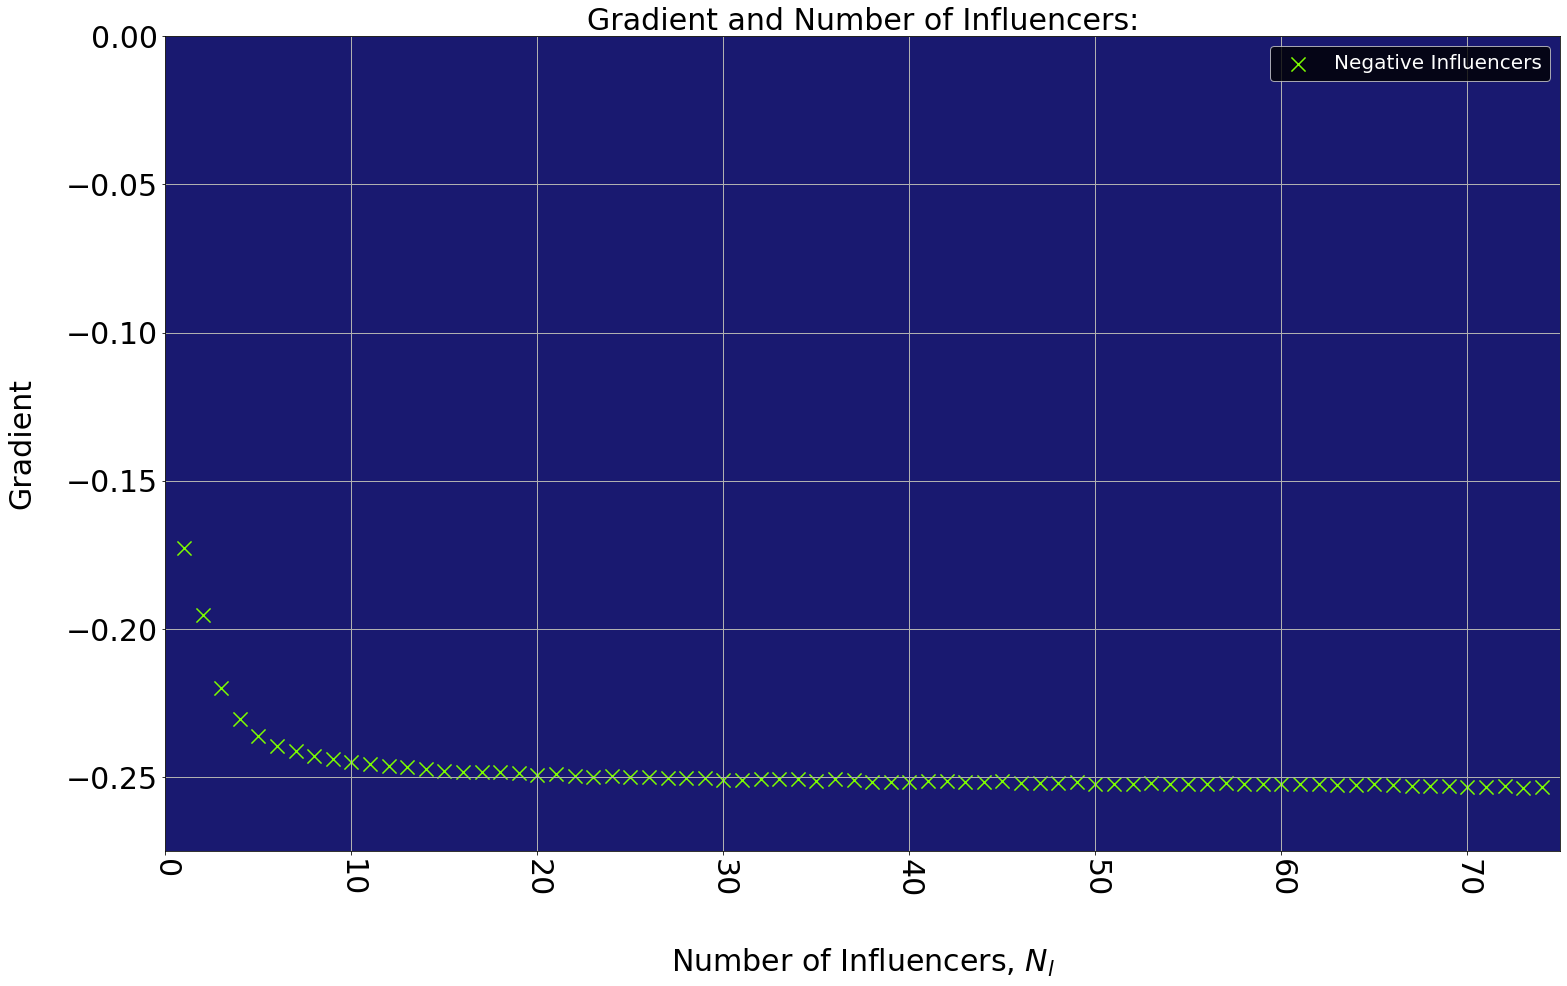

In [8]:
# Figure parameters

plt.figure(1, figsize=(25,15))
xlabel('Number of Influencers, $\itN_{l}$', fontsize=30, labelpad=50)
ylabel('Gradient', fontsize=30, labelpad=30)
title("Gradient and Number of Influencers:", fontsize=30)
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-0.275, ymax=0)
xlim(xmin=0, xmax=75)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

label = "Negative Influencers"

# for negative influencers
number_influencers2 = np.array(gradient_data)[:,0]
gradient_changes2 = np.array(gradient_data)[:,1]
p1 = scatter(number_influencers2, gradient_changes2, marker='x', color='lawngreen', s=200, label=label)


leg = plt.legend(loc='upper right', prop={'size': 20}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")
    
    
slope = np.polyfit(number_influencers2, gradient_changes2, 1)
print(slope)
        
show()

In [10]:
neg_inf_gradient_data = neg_inf_gradient_data
print(len(neg_inf_gradient_data))

74


In [11]:
def getChangeInOpinionData(filename):

    step = []
    opinions = []
    cs = []

    # a list of prices go in each time level
    mean_op_data = []

    for i in range(1000):
        mean_op_data.append([i,[]])

    # go through csv, add all data to transactions list

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        trial_count = 0
        time_period = 225
        for row in readCSV:
            ntime=float(row[0])
            opinion = float(row[1])
            index = int(ntime)
            mean_op_data[index][1].append(opinion)


    time_axis = np.arange(0, 1000, 1)
    mean_opinion_list = []
    std_dev_pos_list = []
    std_dev_neg_list = []

    for i in range(1000):

        std_dev = np.std(mean_op_data[i][1])
        mean = np.mean(mean_op_data[i][1])

        mean_opinion_list.append(mean)
        std_dev_pos_list.append(mean + std_dev)
        std_dev_neg_list.append(mean - std_dev)

    #######################################################

    return(time_axis, mean_opinion_list)

In [12]:
# Get all the data, store the change in mean opinion over time for every file, store it in data_iter

data_iter = []

for i in range(1, 75):
    data_iter.append([i])
    
directory = r'./NegativeInfluencers'

print('Going through NegativeInfluencers results...')
for filename in os.listdir(directory):
    
    if(filename[0] == 'n'):
        
        file_path = 'NegativeInfluencers/' + filename
        
        print("Getting data from {}".format(file_path))
        
        # get index from number of influencers
        num_influencers = int(filename.partition('_')[2].partition('_')[2].partition('.')[0])
        index = num_influencers - 1
        
        # now get data for x and y and store it where the index is
        time_data, mean_data = getChangeInOpinionData(file_path)
        data_iter[index].append([time_data, mean_data])
        
print('Done')


Going through NegativeInfluencers results...
Getting data from NegativeInfluencers/noninf_ops_72.csv


/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Getting data from NegativeInfluencers/noninf_ops_66.csv
Getting data from NegativeInfluencers/noninf_ops_67.csv
Getting data from NegativeInfluencers/noninf_ops_73.csv
Getting data from NegativeInfluencers/noninf_ops_65.csv
Getting data from NegativeInfluencers/noninf_ops_71.csv
Getting data from NegativeInfluencers/noninf_ops_59.csv
Getting data from NegativeInfluencers/noninf_ops_58.csv
Getting data from NegativeInfluencers/noninf_ops_70.csv
Getting data from NegativeInfluencers/noninf_ops_64.csv
Getting data from NegativeInfluencers/noninf_ops_48.csv
Getting data from NegativeInfluencers/noninf_ops_60.csv
Getting data from NegativeInfluencers/noninf_ops_74.csv
Getting data from NegativeInfluencers/noninf_ops_61.csv
Getting data from NegativeInfluencers/noninf_ops_49.csv
Getting data from NegativeInfluencers/noninf_ops_63.csv
Getting data from NegativeInfluencers/noninf_ops_62.csv
Getting data from NegativeInfluencers/noninf_ops_11.csv
Getting data from NegativeInfluencers/noninf_ops

<ipython-input-16-af34b55ad0b8>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


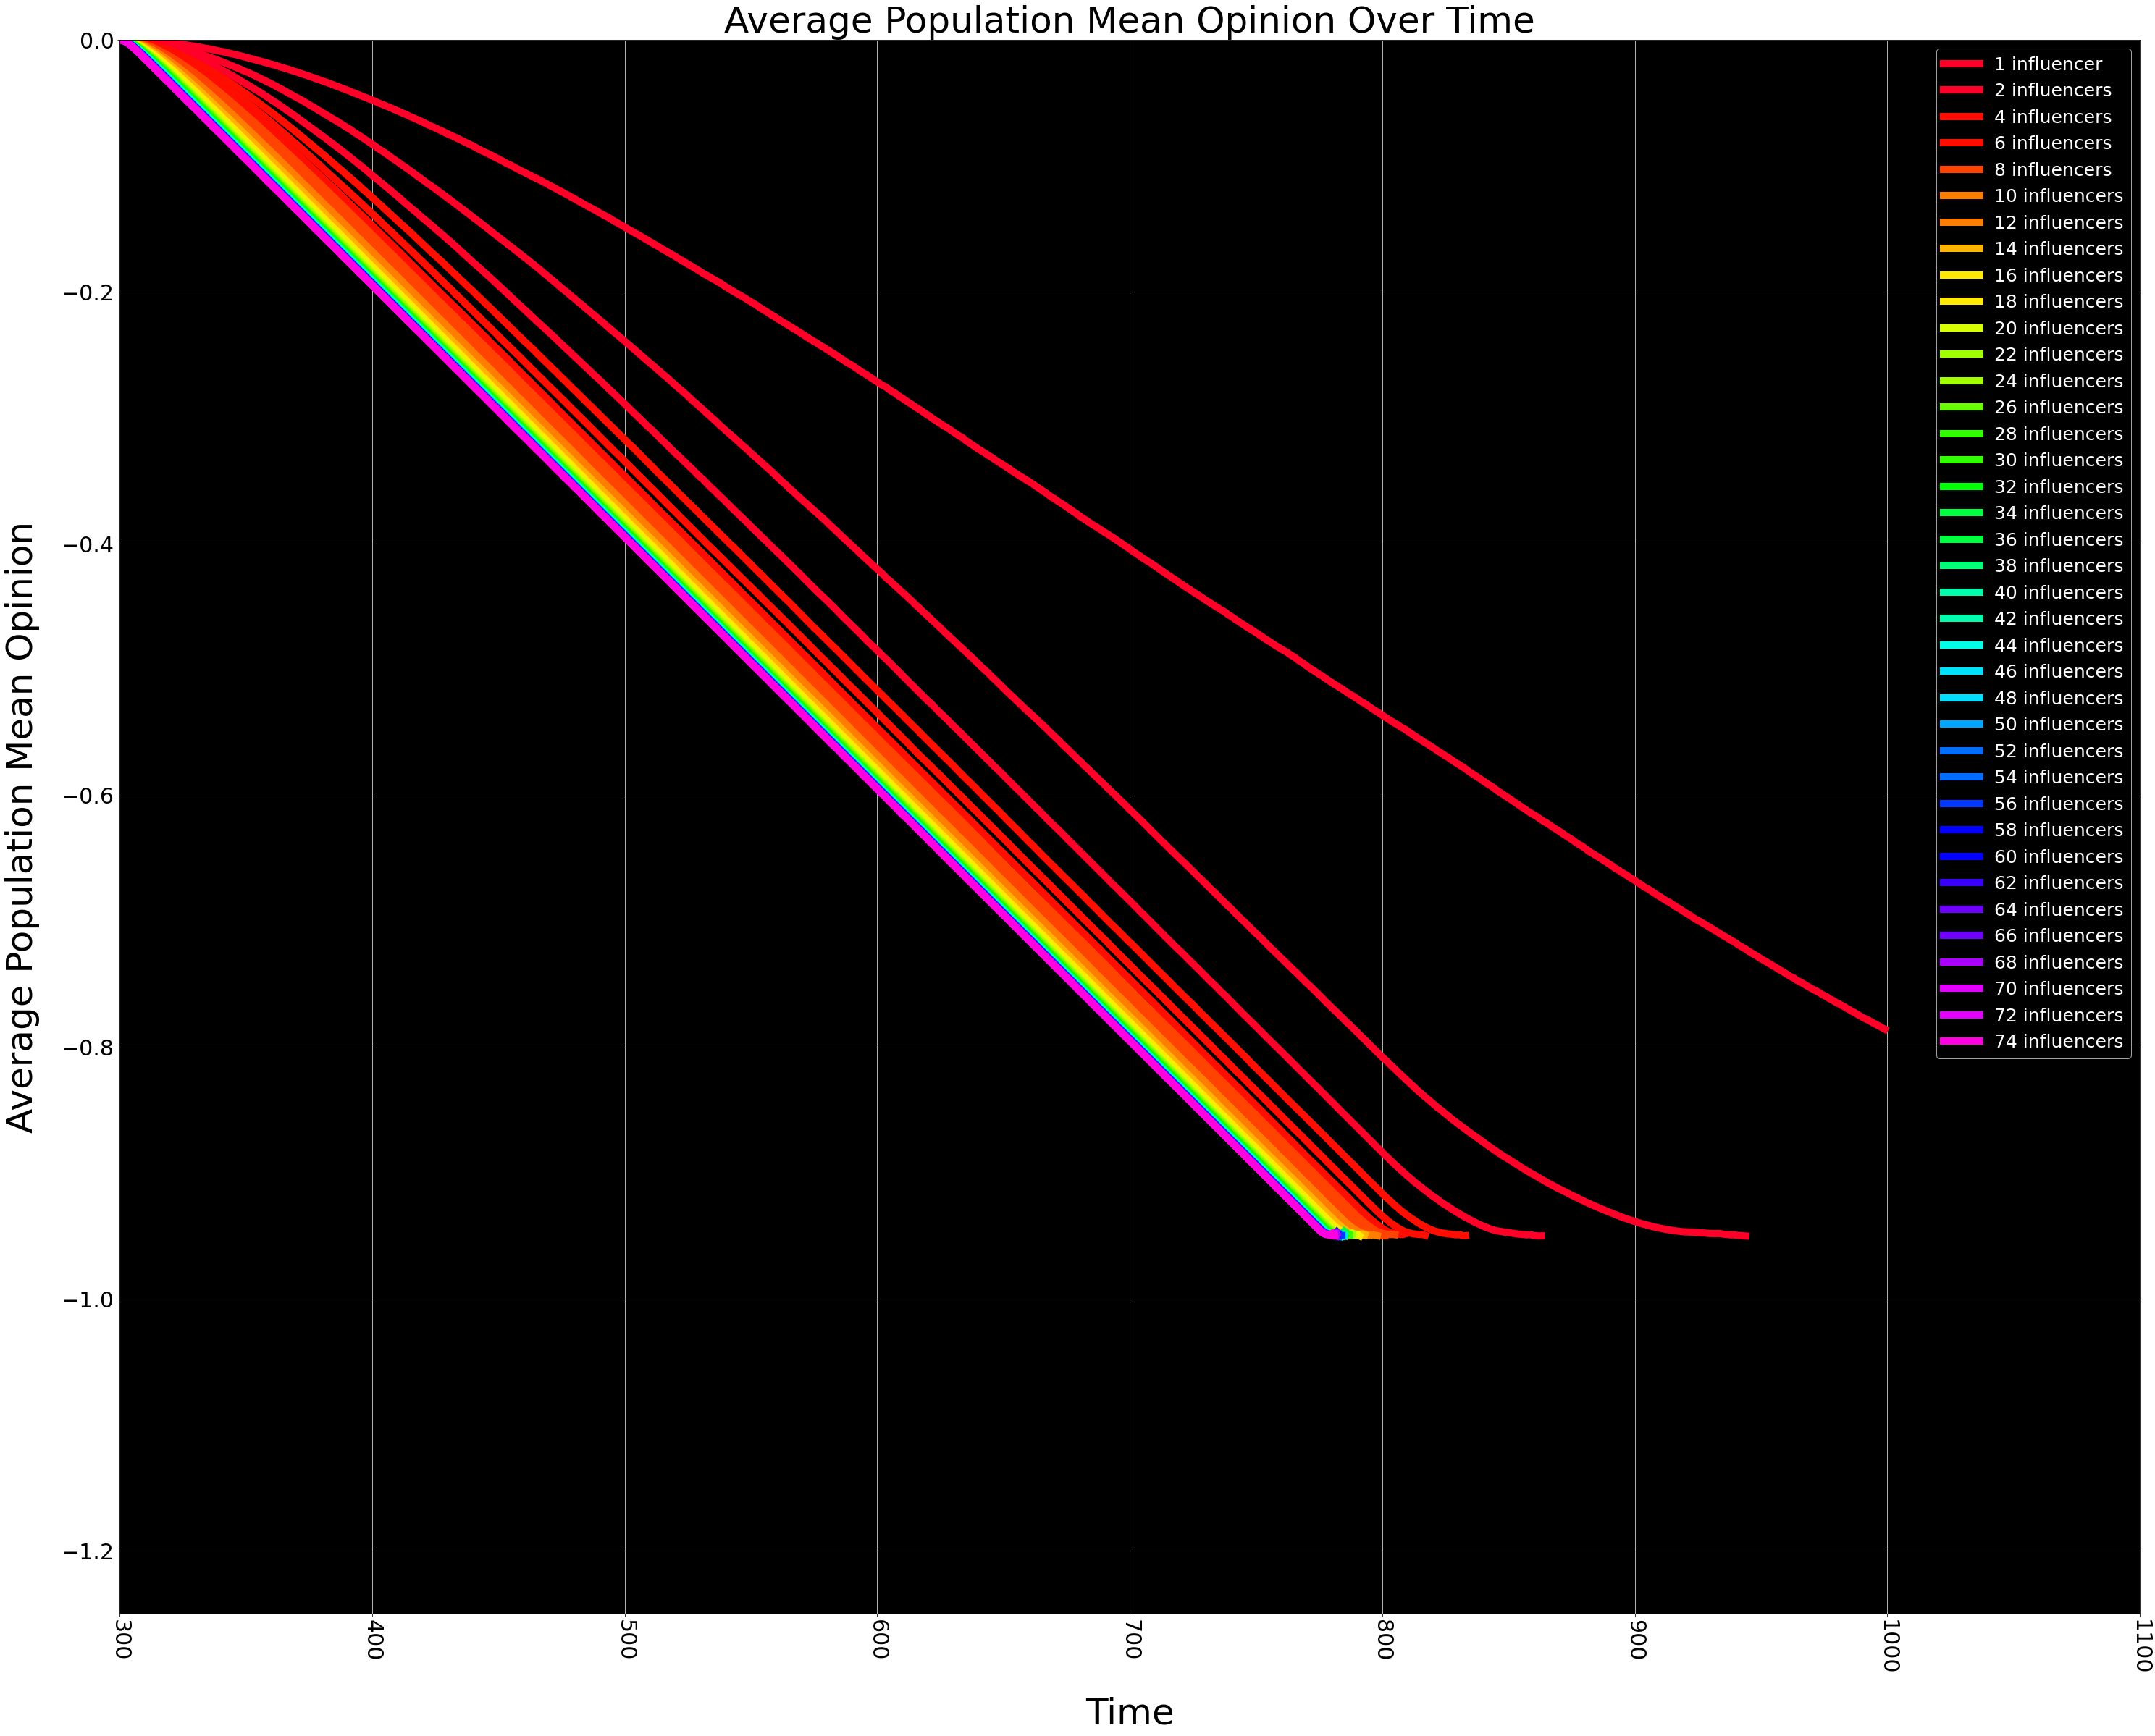

In [16]:
##########################################################################
# Plot data

plt.figure(1, figsize=(50,40))
xlabel('Time', fontsize=50, labelpad=30)
ylabel('Average Population Mean Opinion', fontsize=50, labelpad=30)
title("Average Population Mean Opinion Over Time", fontsize=50)
label='Transaction Price'
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-1.25, ymax=0)
xlim(xmin=300, xmax=1100)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

################
# Colours 

NUM_COLORS = 74
cm = plt.get_cmap('gist_rainbow')

#p1 = scatter(number_influencers2, gradient_changes2, marker='x', color='red', s=150, label=label)

for i in range(NUM_COLORS):
    if(data_iter[i][0]) > 1:
        label = str(data_iter[i][0]) + " influencers"
    else:
        label = str(data_iter[i][0]) + " influencer"
    if(i%2 != 0 or i == 0):
        lines = plot(data_iter[i][1][0], data_iter[i][1][1], label=label)
    else:
        lines = plot(data_iter[i][1][0], data_iter[i][1][1])
    lines[0].set_color(cm(i//3*3.0/NUM_COLORS))
    lines[0].set_linewidth(10)

##############

# plotting everything now...
label = "Average Population Mean"

leg = plt.legend(loc='upper right', prop={'size': 25}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")

#plt.savefig('Graphs/-50_shock_oprzi_gp_opinions.png',dpi=200,bbox_inches='tight',pad_inches=0)
#plt.savefig('Graphs/-50_shock_oprzi_gp_opinions.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

#plt.savefig('Graphs/neg_shock_oprzi_offset.png',dpi=200,bbox_inches='tight',pad_inches=0)
#plt.savefig('Graphs/neg_shock_oprzi_offset.pdf',dpi=200,bbox_inches='tight',pad_inches=0)
show()

In [18]:
neg_inf_op_data_iter = neg_inf_op_data_iter
print(len(neg_inf_op_data_iter))

74


In [19]:
def getSlope(SESS_NUMBER, trans_data, non_inf_max_data):
    
    time_data = np.array(trans_data[SESS_NUMBER - 1][1])[:,0]
    transaction_data = np.array(trans_data[SESS_NUMBER - 1][1])[:,1]
    max_time = non_inf_max_data[SESS_NUMBER - 1][1]
    
    # get mean price before 
    mean_pre_list = []
    highest_mean = 0
    for i in range(len(time_data)):
        if(time_data[i] < 300):
            mean_pre_list.append(transaction_data[i])
        else:
            if(time_data[i] <= max_time):
                if(transaction_data[i] > highest_mean):
                    highest_mean = transaction_data[i]
    
    slope = (highest_mean - np.mean(mean_pre_list)) / (max_time - 300)
    
    return slope


In [20]:
def getNewAverageGradient(trans_filename, non_inf_filename):
    
    # first, sort all the data into respective session data 

    ##########################################################################################
    # 1: sort non influencers data
    filename = non_inf_filename

    # stores the num influencers and times when the 95% threshold was reached for each of the 200 sessions
    non_inf_max_data = []
    for i in range(0, 200):
        non_inf_max_data.append([i+1,[]])

    # just stores all csv data 
    data_lake = []

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        for row in readCSV:
            data_lake.append([float(row[0]), float(row[1])])

    prev_time = 0
    sess_number = 1

    for i in data_lake:
        if(prev_time == 0):
                prev_time = float(i[0])
        else:
            if(float(i[0]) - prev_time < 0):
                non_inf_max_data[sess_number - 1][1] = prev_time
                prev_time = float(i[0])
                sess_number += 1
            else:
                prev_time = float(i[0])

    non_inf_max_data[-1][1] = float(i[0])

    ##########################################################################################
    
    ##########################################################################################
    # 2: sort all transactions data
    filename = trans_filename

    # stores the num influencers and times when the 95% threshold was reached for each of the 200 sessions
    trans_data = []
    for i in range(0, 200):
        trans_data.append([i+1,[]])

    # just stores all csv data 
    data_lake = []

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        for row in readCSV:
            data_lake.append([float(row[0]), float(row[1])])

    prev_time = 0
    sess_number = 1

    for i in data_lake:
        if(prev_time == 0):
                prev_time = float(i[0])
                trans_price = float(i[1])
                trans_data[sess_number - 1][1].append([prev_time, trans_price])
        else:
            if(float(i[0]) - prev_time < 0):
                sess_number += 1
                prev_time = float(i[0])
                trans_price = float(i[1])
                trans_data[sess_number - 1][1].append([prev_time, trans_price])
            else:
                prev_time = float(i[0])
                prev_time = float(i[0])
                trans_price = float(i[1])
                trans_data[sess_number - 1][1].append([prev_time, trans_price])

    ##########################################################################################
    
    slope_data = []
    SESS_NUMBER = 0

    for i in range(1, 201):
        SESS_NUMBER = i
        #print("Session #{}".format(i))
        slope_data.append(getSlope(SESS_NUMBER, trans_data, non_inf_max_data))

    mean_gradient = np.mean(slope_data)
    return mean_gradient

In [21]:
#print(getAverageGradient(trans_filename, non_inf_filename))
gradient_data = []


# Get all the data, store the change in mean opinion over time for every file, store it in data_iter

data_iter = []

for i in range(1, 25):
    data_iter.append([i])
    
directory = r'../PositiveInfluencers/PositiveInfluencers'

print('Going through positive results...')
for filename in os.listdir(directory):
    
    if(filename[0] != 'n' and filename[0] != '.' and filename[0] != '.'):
        
        trans_filename = '../PositiveInfluencers/PositiveInfluencers/' + filename
        
        print("Getting data from {}...".format(trans_filename))
                
        # get index from number of influencers
        num_influencers = int(filename.partition('.')[0])
        non_inf_filename = '../PositiveInfluencers/PositiveInfluencers/noninf_ops_' + str(num_influencers) + '.csv'
        gradient_data.append([num_influencers, getNewAverageGradient(trans_filename, non_inf_filename)])

        
print('Done')

Going through positive results...
Getting data from ../PositiveInfluencers/PositiveInfluencers/68.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/6.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/54.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/40.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/41.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/7.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/55.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/69.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/43.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/57.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/5.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/56.csv...
Getting data from ../PositiveInfluencers/PositiveInfluencers/4.csv...
Getting data from ../PositiveInfluencers/Positi

<ipython-input-22-9cca674e1a3d>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


[0.00017134 0.13422205]


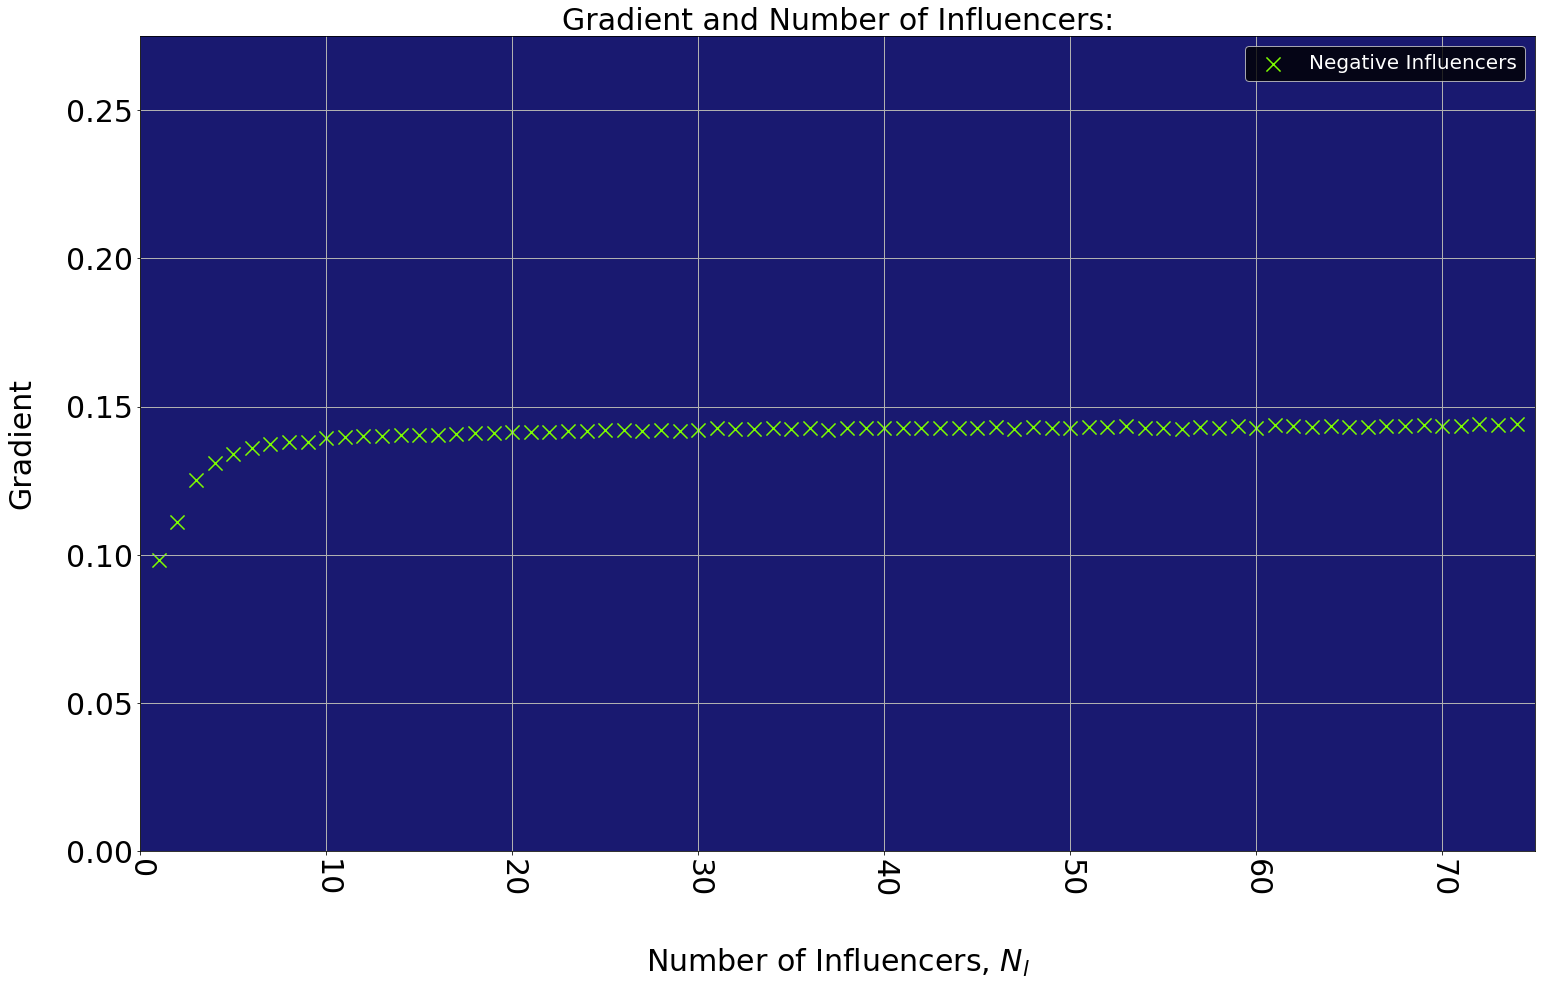

In [22]:
# Figure parameters

plt.figure(1, figsize=(25,15))
xlabel('Number of Influencers, $\itN_{l}$', fontsize=30, labelpad=50)
ylabel('Gradient', fontsize=30, labelpad=30)
title("Gradient and Number of Influencers:", fontsize=30)
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=0, ymax=0.275)
xlim(xmin=0, xmax=75)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

label = "Negative Influencers"

# for negative influencers
number_influencers2 = np.array(gradient_data)[:,0]
gradient_changes2 = np.array(gradient_data)[:,1]
p1 = scatter(number_influencers2, gradient_changes2, marker='x', color='lawngreen', s=200, label=label)


leg = plt.legend(loc='upper right', prop={'size': 20}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")
    
    
slope = np.polyfit(number_influencers2, gradient_changes2, 1)
print(slope)
        
show()

In [24]:
pos_inf_gradient_data = pos_inf_gradient_data
print(len(pos_inf_gradient_data))

74


In [25]:
def getChangeInOpinionData(filename):

    step = []
    opinions = []
    cs = []

    # a list of prices go in each time level
    mean_op_data = []

    for i in range(1000):
        mean_op_data.append([i,[]])

    # go through csv, add all data to transactions list

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        trial_count = 0
        time_period = 225
        for row in readCSV:
            ntime=float(row[0])
            opinion = float(row[1])
            index = int(ntime)
            mean_op_data[index][1].append(opinion)


    time_axis = np.arange(0, 1000, 1)
    mean_opinion_list = []
    std_dev_pos_list = []
    std_dev_neg_list = []

    for i in range(1000):

        std_dev = np.std(mean_op_data[i][1])
        mean = np.mean(mean_op_data[i][1])

        mean_opinion_list.append(mean)
        std_dev_pos_list.append(mean + std_dev)
        std_dev_neg_list.append(mean - std_dev)

    #######################################################

    return(time_axis, mean_opinion_list)

In [26]:
# Get all the data, store the change in mean opinion over time for every file, store it in data_iter

data_iter = []

for i in range(1, 75):
    data_iter.append([i])
    
directory = r'../PositiveInfluencers/PositiveInfluencers'

print('Going through pos results...')
for filename in os.listdir(directory):
    
    if(filename[0] == 'n'):
        
        file_path = '../PositiveInfluencers/PositiveInfluencers/' + filename
        
        print("Getting data from {}".format(file_path))
        
        # get index from number of influencers
        num_influencers = int(filename.partition('_')[2].partition('_')[2].partition('.')[0])
        index = num_influencers - 1
        
        # now get data for x and y and store it where the index is
        time_data, mean_data = getChangeInOpinionData(file_path)
        data_iter[index].append([time_data, mean_data])
        
print('Done')


Going through pos results...
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_72.csv


/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_66.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_67.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_73.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_65.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_71.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_59.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_58.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_70.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_64.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_48.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_60.csv
Getting data from ../PositiveInfluencers/PositiveInfluencers/noninf_ops_74.csv
Getting data from ../PositiveInfluencers/PositiveInf

In [11]:
pos_inf_op_data_iter = pos_inf_op_data_iter
print(len(pos_inf_op_data_iter))

24


<ipython-input-27-e67a8d7209bf>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


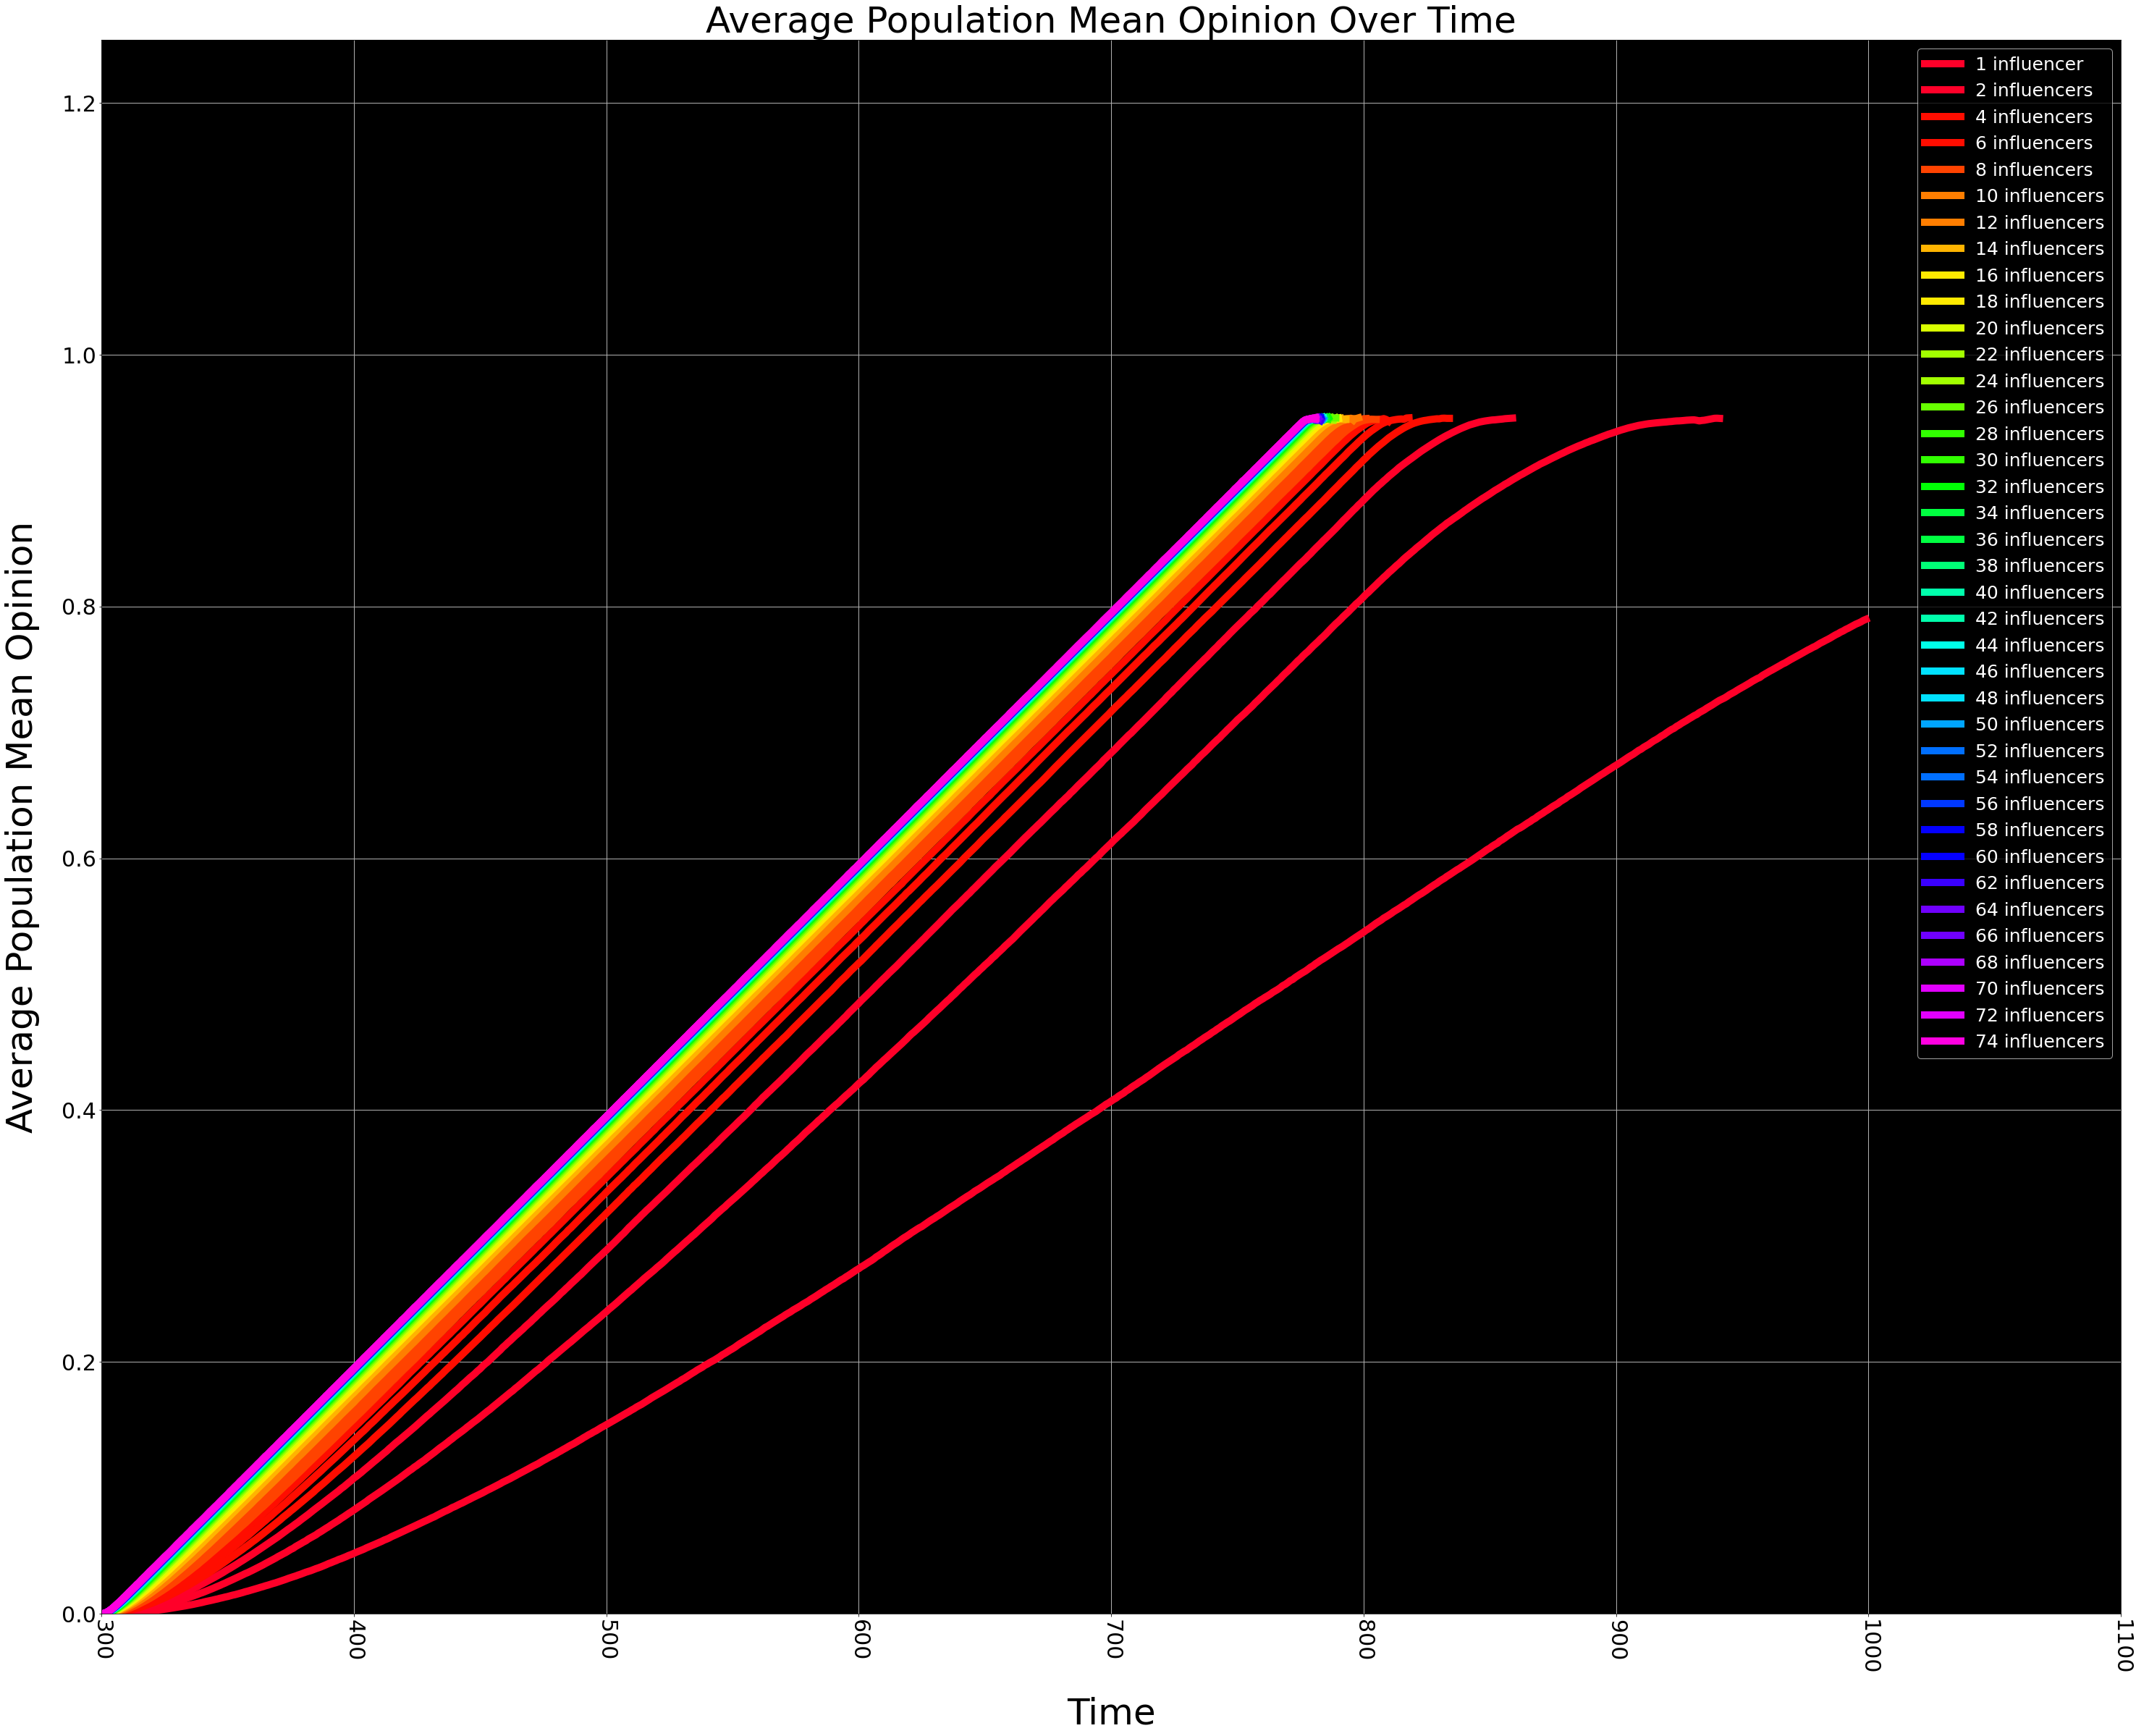

In [27]:
##########################################################################
# Plot data

plt.figure(1, figsize=(50,40))
xlabel('Time', fontsize=50, labelpad=30)
ylabel('Average Population Mean Opinion', fontsize=50, labelpad=30)
title("Average Population Mean Opinion Over Time", fontsize=50)
label='Transaction Price'
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=0, ymax=1.25)
xlim(xmin=300, xmax=1100)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

################
# Colours 

NUM_COLORS = 74
cm = plt.get_cmap('gist_rainbow')

#p1 = scatter(number_influencers2, gradient_changes2, marker='x', color='red', s=150, label=label)

for i in range(NUM_COLORS):
    if(data_iter[i][0]) > 1:
        label = str(data_iter[i][0]) + " influencers"
    else:
        label = str(data_iter[i][0]) + " influencer"
    if(i%2 != 0 or i == 0):
        lines = plot(data_iter[i][1][0], data_iter[i][1][1], label=label)
    else:
        lines = plot(data_iter[i][1][0], data_iter[i][1][1])
    lines[0].set_color(cm(i//3*3.0/NUM_COLORS))
    lines[0].set_linewidth(10)

##############

# plotting everything now...
label = "Average Population Mean"

leg = plt.legend(loc='upper right', prop={'size': 25}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")

#plt.savefig('Graphs/-50_shock_oprzi_gp_opinions.png',dpi=200,bbox_inches='tight',pad_inches=0)
#plt.savefig('Graphs/-50_shock_oprzi_gp_opinions.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

#plt.savefig('Graphs/neg_shock_oprzi_offset.png',dpi=200,bbox_inches='tight',pad_inches=0)
#plt.savefig('Graphs/neg_shock_oprzi_offset.pdf',dpi=200,bbox_inches='tight',pad_inches=0)
show()

In [29]:
pos_inf_op_data_iter = pos_inf_op_data_iter

<ipython-input-31-260a6144a6af>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


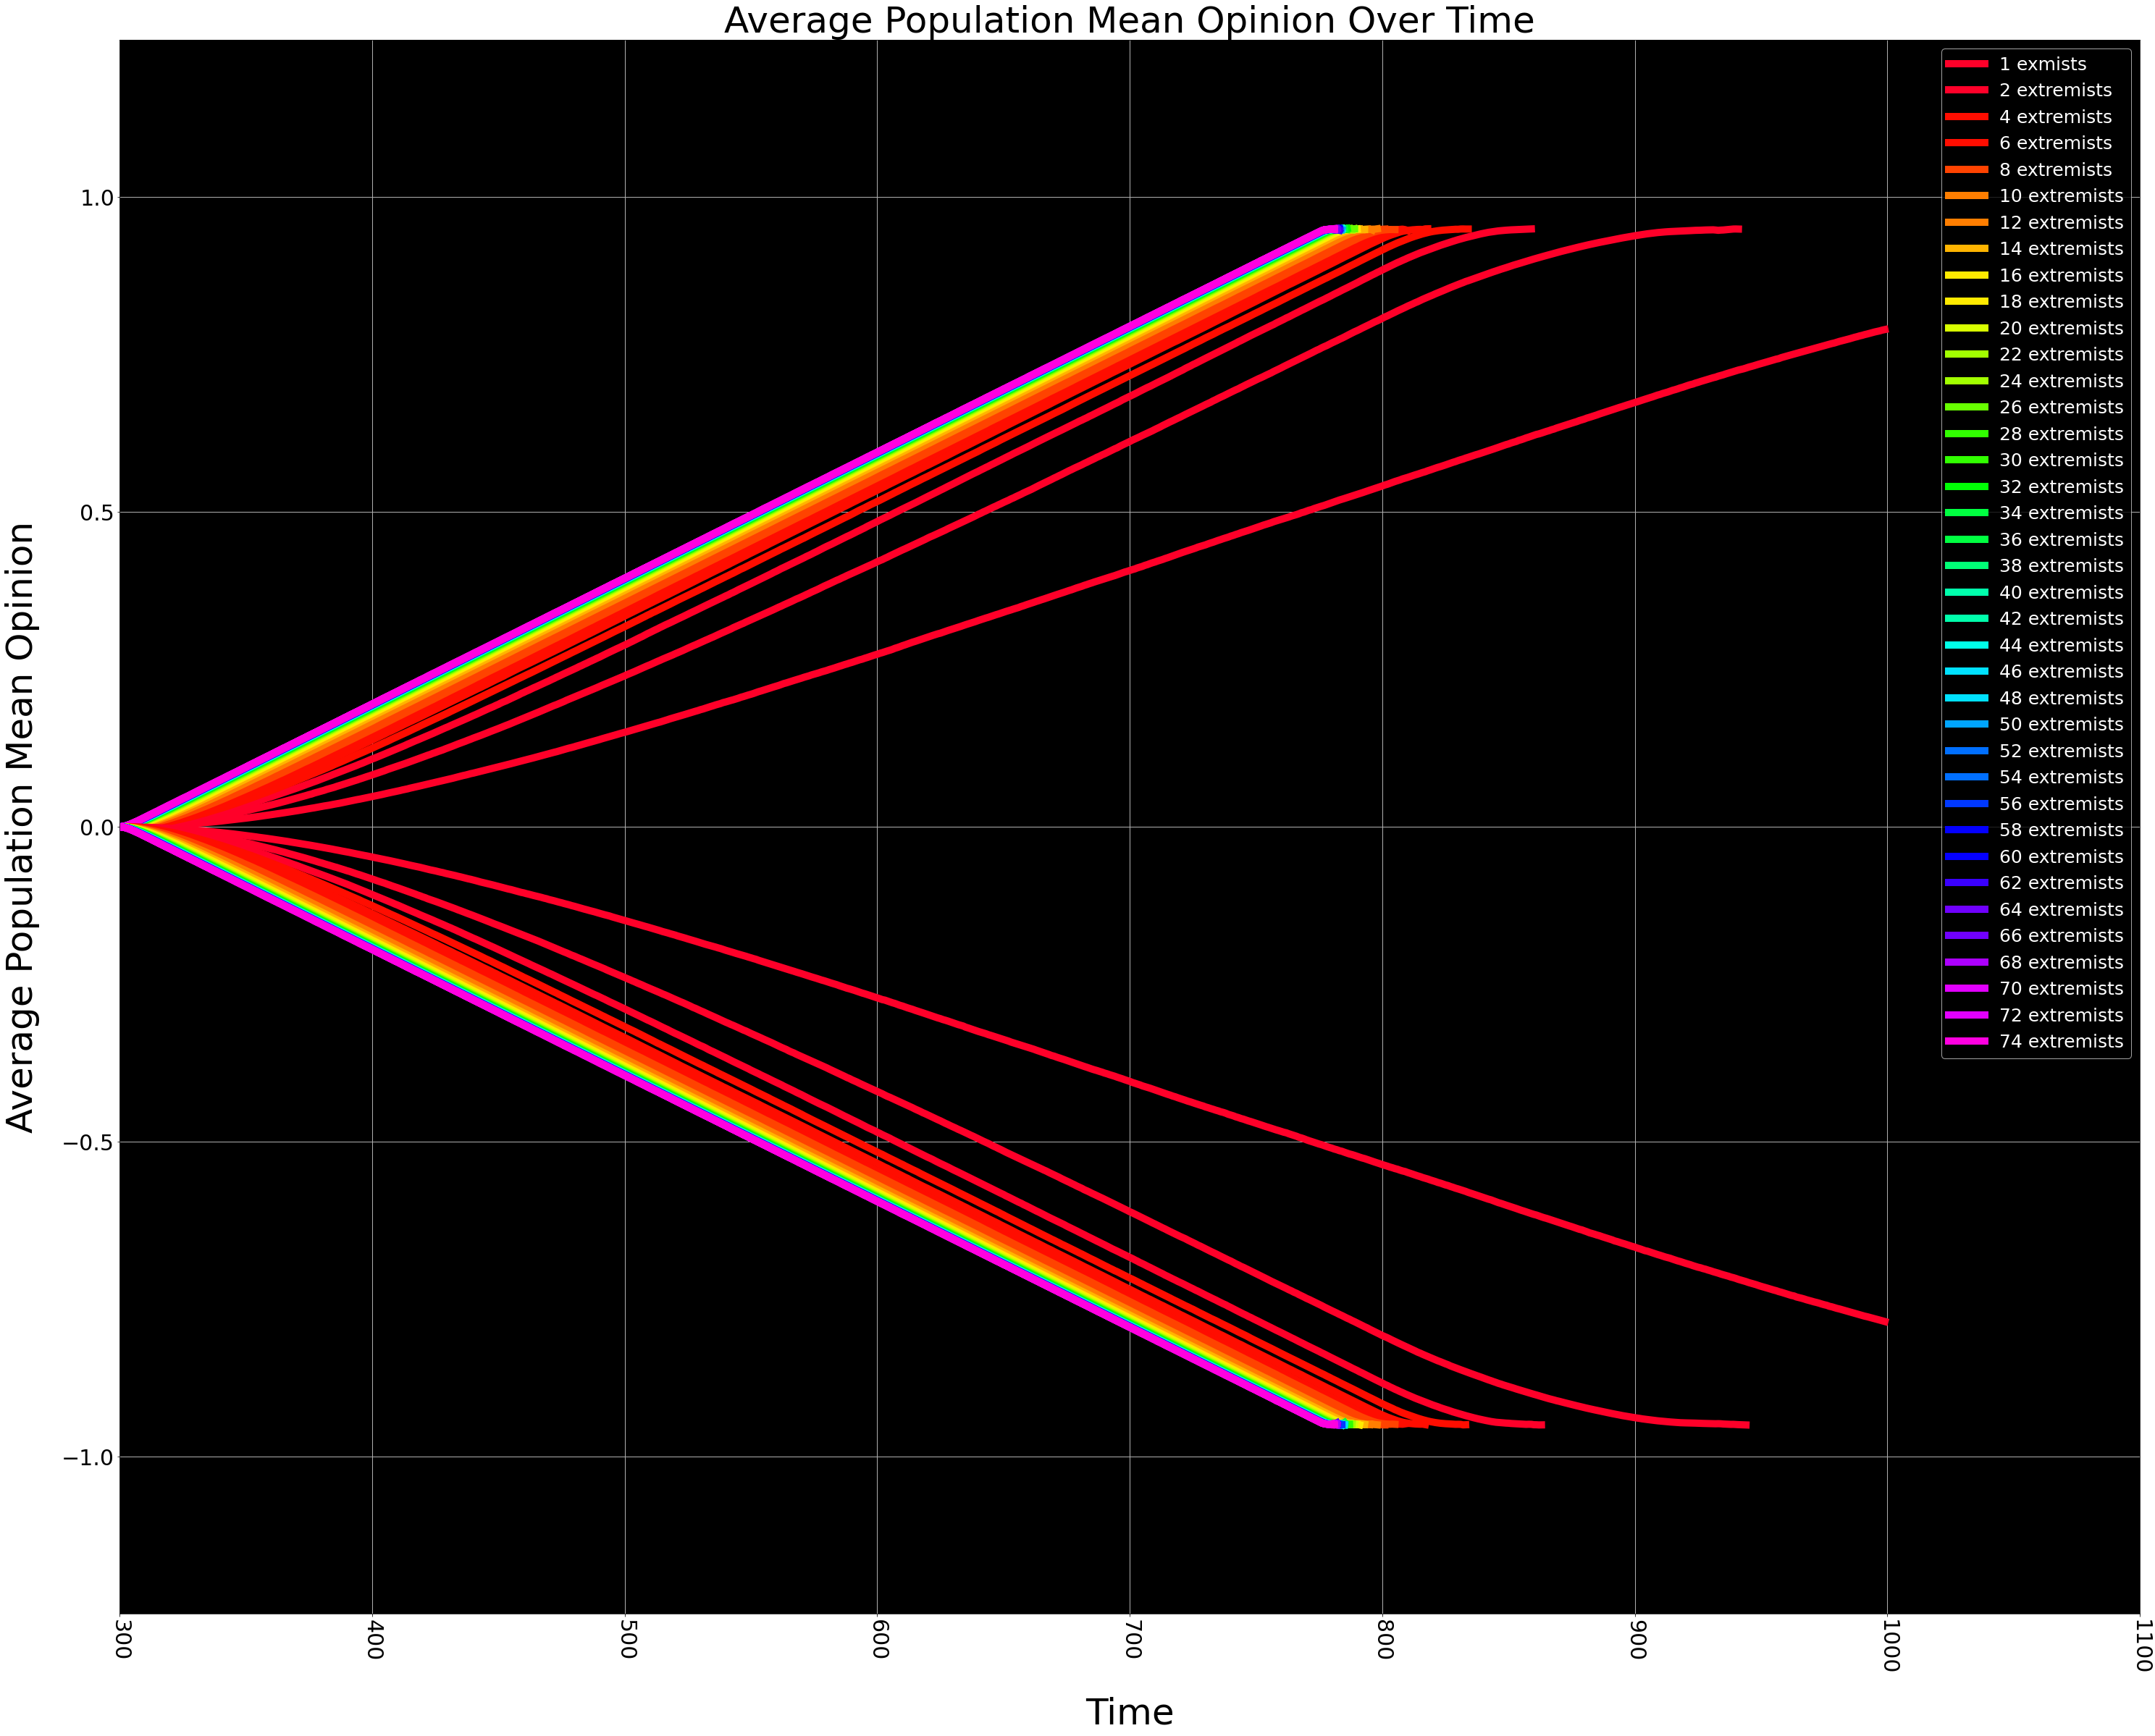

In [31]:
##########################################################################
# Plot data

plt.figure(1, figsize=(50,40))
xlabel('Time', fontsize=50, labelpad=30)
ylabel('Average Population Mean Opinion', fontsize=50, labelpad=30)
title("Average Population Mean Opinion Over Time", fontsize=50)
label='Transaction Price'
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-1.25, ymax=1.25)
xlim(xmin=300, xmax=1100)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

################
# Colours 

NUM_COLORS = 74
cm = plt.get_cmap('gist_rainbow')

#p1 = scatter(number_influencers2, gradient_changes2, marker='x', color='red', s=150, label=label)

for i in range(NUM_COLORS):
    if(data_iter[i][0]) > 1:
        label = str(pos_inf_op_data_iter[i][0]) + " extremists"
    else:
        label = str(pos_inf_op_data_iter[i][0]) + " exmists"
    if(i%2 != 0 or i == 0):
        lines = plot(data_iter[i][1][0], data_iter[i][1][1], label=label)
    else:
        lines = plot(data_iter[i][1][0], data_iter[i][1][1])
    lines[0].set_color(cm(i//3*3.0/NUM_COLORS))
    lines[0].set_linewidth(10)

##############

################
# Colours 

NUM_COLORS = 74
cm = plt.get_cmap('gist_rainbow')

#p1 = scatter(number_influencers2, gradient_changes2, marker='x', color='red', s=150, label=label)

for i in range(NUM_COLORS):
    lines = plot(neg_inf_op_data_iter[i][1][0], neg_inf_op_data_iter[i][1][1])
    lines[0].set_color(cm(i//3*3.0/NUM_COLORS))
    lines[0].set_linewidth(10)

##############

# plotting everything now...
label = "Average Population Mean"

leg = plt.legend(loc='upper right', prop={'size': 25}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")
    
plt.savefig('Graphs/ops.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/ops.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

#plt.savefig('Graphs/-50_shock_oprzi_gp_opinions.png',dpi=200,bbox_inches='tight',pad_inches=0)
#plt.savefig('Graphs/-50_shock_oprzi_gp_opinions.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

#plt.savefig('Graphs/neg_shock_oprzi_offset.png',dpi=200,bbox_inches='tight',pad_inches=0)
#plt.savefig('Graphs/neg_shock_oprzi_offset.pdf',dpi=200,bbox_inches='tight',pad_inches=0)
show()

<ipython-input-56-4066aa398cb6>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


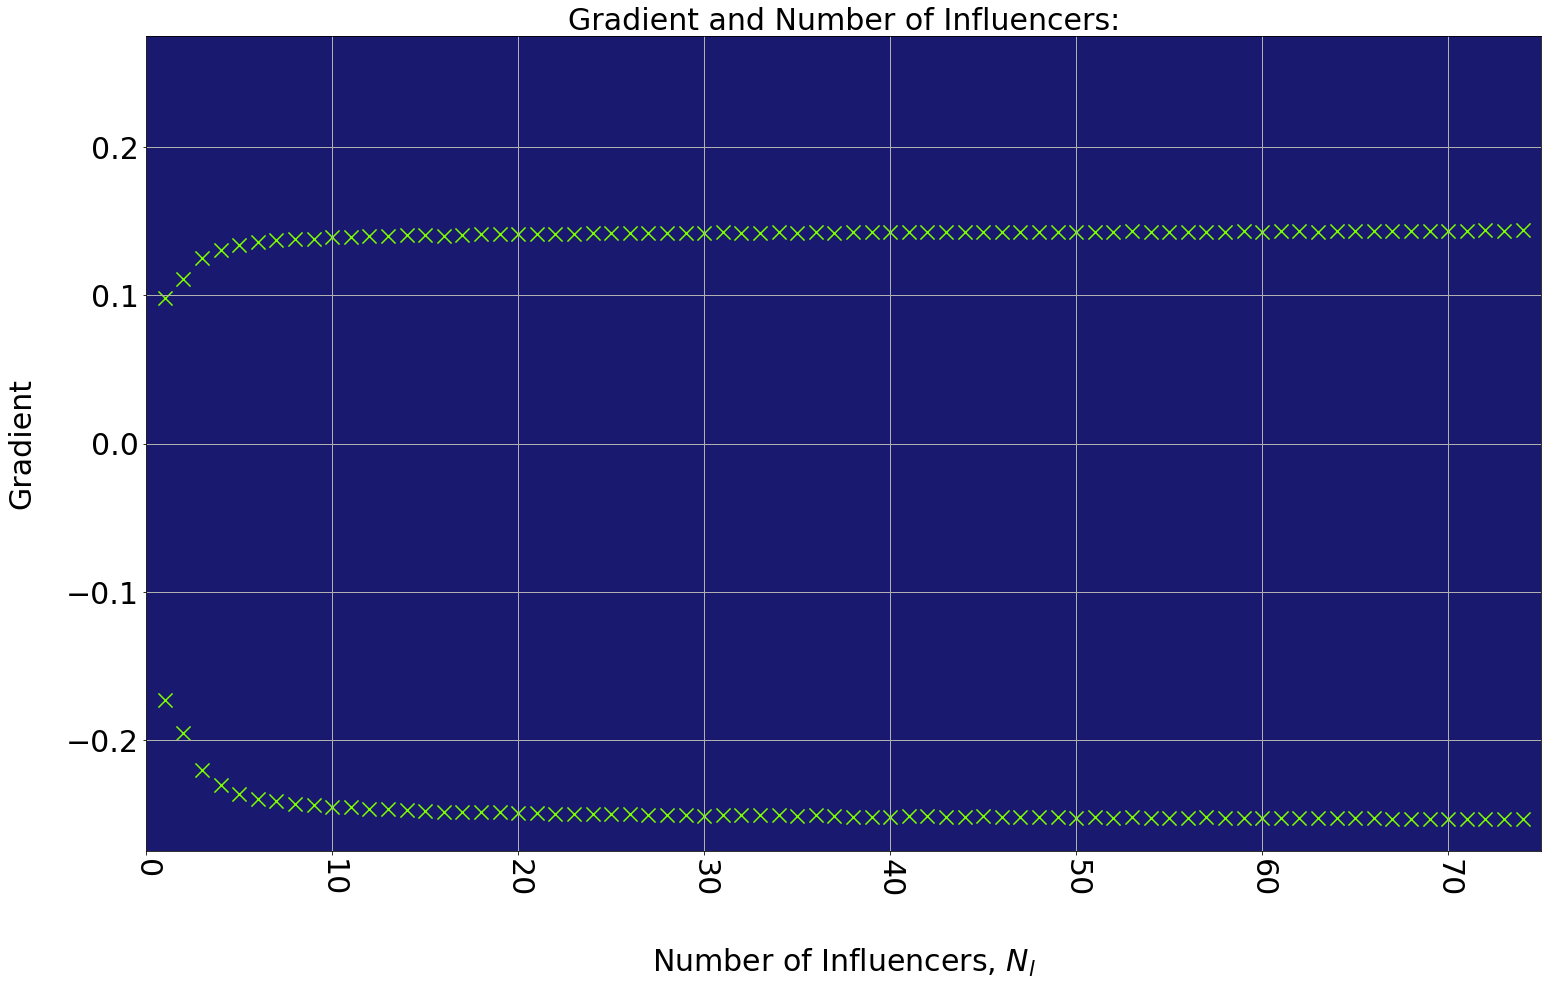

In [56]:
# Figure parameters

plt.figure(1, figsize=(25,15))
xlabel('Number of Influencers, $\itN_{l}$', fontsize=30, labelpad=50)
ylabel('Gradient', fontsize=30, labelpad=30)
title("Gradient and Number of Influencers:", fontsize=30)
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-0.275, ymax=0.275)
xlim(xmin=0, xmax=75)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

# for negative influencers
number_influencers2 = np.array(gradient_data)[:,0]
#gradient_changes2 = np.array(gradient_data)[:,1]
#pos_inf_gradient_data = np.array(pos_inf_gradient_data)[:,1]
#neg_inf_gradient_data = np.array(neg_inf_gradient_data)[:,1]


p1 = scatter(number_influencers2, pos_inf_gradient_data, marker='x', color='lawngreen', s=200)


p2 = scatter(number_influencers2, neg_inf_gradient_data, marker='x', color='lawngreen', s=200)



    
    
#slope = np.polyfit(number_influencers2, gradient_changes2, 1)
#print(slope)


plt.savefig('Graphs/grads.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/grads.pdf',dpi=200,bbox_inches='tight',pad_inches=0)
        
show()